<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/Historic_Crypto_Puller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
!pip install requests
!pip install pandas
!pip install numpy

In [117]:
import requests
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import drive, files
drive.mount('/content/drive')
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cycles = []
urls = []
from datetime import datetime  
from datetime import timedelta  

timer = datetime.date(datetime(year=2020, month=5, day=3)) 

for i in range(90):
 timer = timer + timedelta(days=1)
 #cycles.append(timer)
 print(timer)
 urls.append('https://rest.coinapi.io/v1/ohlcv/BTC/USD/history?period_id=1DAY&time_start={}T00:00:00'.format(timer))

2020-05-04
2020-05-05
2020-05-06
2020-05-07
2020-05-08
2020-05-09
2020-05-10
2020-05-11
2020-05-12
2020-05-13
2020-05-14
2020-05-15
2020-05-16
2020-05-17
2020-05-18
2020-05-19
2020-05-20
2020-05-21
2020-05-22
2020-05-23
2020-05-24
2020-05-25
2020-05-26
2020-05-27
2020-05-28
2020-05-29
2020-05-30
2020-05-31
2020-06-01
2020-06-02
2020-06-03
2020-06-04
2020-06-05
2020-06-06
2020-06-07
2020-06-08
2020-06-09
2020-06-10
2020-06-11
2020-06-12
2020-06-13
2020-06-14
2020-06-15
2020-06-16
2020-06-17
2020-06-18
2020-06-19
2020-06-20
2020-06-21
2020-06-22
2020-06-23
2020-06-24
2020-06-25
2020-06-26
2020-06-27
2020-06-28
2020-06-29
2020-06-30
2020-07-01
2020-07-02
2020-07-03
2020-07-04
2020-07-05
2020-07-06
2020-07-07
2020-07-08
2020-07-09
2020-07-10
2020-07-11
2020-07-12
2020-07-13
2020-07-14
2020-07-15
2020-07-16
2020-07-17
2020-07-18
2020-07-19
2020-07-20
2020-07-21
2020-07-22
2020-07-23
2020-07-24
2020-07-25
2020-07-26
2020-07-27
2020-07-28
2020-07-29
2020-07-30
2020-07-31
2020-08-01


In [ ]:
cycles

[]

In [ ]:
urls

In [ ]:
apikey = ''
datas = []
headers = {
    'X-CoinAPI-Key': apikey
}
for url in urls:
 response = requests.get(url, headers=headers).json()
 datas.append(response)

In [ ]:
datas[89]

[{'price_close': 11810.07,
  'price_high': 11894.73,
  'price_low': 11228.0,
  'price_open': 11351.61,
  'time_close': '2020-08-01T23:59:59.9607290Z',
  'time_open': '2020-08-01T00:00:00.2127820Z',
  'time_period_end': '2020-08-02T00:00:00.0000000Z',
  'time_period_start': '2020-08-01T00:00:00.0000000Z',
  'trades_count': 238735,
  'volume_traded': 38179.618191884},
 {'price_close': 11173.92,
  'price_high': 12134.29,
  'price_low': 10546.15,
  'price_open': 11810.07,
  'time_close': '2020-08-02T22:30:11.3495050Z',
  'time_open': '2020-08-02T00:00:00.1568830Z',
  'time_period_end': '2020-08-03T00:00:00.0000000Z',
  'time_period_start': '2020-08-02T00:00:00.0000000Z',
  'trades_count': 252856,
  'volume_traded': 51680.403142733}]

In [ ]:
start_date = []
price_open = []
price_close = []
price_high = []
price_low = []
trades_count = []
volume_traded = []

for request in datas:
  for day in request:
    for key, value in day.items():
     if key == 'time_period_start':
       start_date.append(value.split('T')[0])
     elif key == 'price_open':
       price_open.append(value)
     elif key == 'price_close':
       price_close.append(value)
     elif key == 'price_high':
       price_high.append(value)
     elif key == 'price_low':
       price_low.append(value)
     elif key == 'trades_count':
       trades_count.append(value)
     if key == 'volume_traded':
       volume_traded.append(value)          

In [ ]:
data = pd.DataFrame()

data['Date'] = start_date
data['Open'] = price_open
data['High'] = price_high
data['Low'] = price_low
data['Close'] = price_close
data['Volume'] = volume_traded

In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
data.drop(axis=1, columns='index', inplace=True)

KeyError: ignored

In [ ]:
data.to_csv('btc_data_end.csv')

In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks/Linear\ Regression\ SKlearn/Real\ Examples/Webscraper/
#data.to_csv('drive/My Drive/Colab Notebooks/Linear Regression SKlearn/Real Examples/Webscraper/BacklinkCheck.csv')
from openpyxl import *

import time
timer = time.strftime('%c')

#file.save('Crypto Data {}.csv'.format(timer))
data.to_csv('drive/My Drive/Colab Notebooks/Cryptos/Crypto Data/Bitcoin_Historic {}.csv'.format(timer))

'BacklinkCheckFri 02:22:11.csv'     'CoinbaseScrapeSun 01:19:29.csv'
'BacklinkCheckFri 02:22:11.gsheet'  'CoinbaseScrapeSun 01:23:13.gsheet'
'BacklinkCheckFri 02:26:36.csv'      FirstCrypto.csv
 BacklinkCheck.gsheet		     FirstCrypto.gsheet
'BacklinkCheckThu 23:08:35.csv'      UrlSamples.gsheet
'BacklinkCheckThu 23:11:08.csv'      Webscraper2.21.2020.ipynb
'BacklinkCheckThu 23:14:58.csv'      Webscraper_V0.2.ipynb
'BacklinkCheckThu 23:25:13.csv'      Webscraper_V0.4.ipynb
 BacklinkScraperV0.1.ipynb


In [ ]:
y = data_cleaned['Price']
x1 = data_cleaned[['Circulating','Total Supply','1 Hour Change %', '1 Day Change %', '7 Day Change %', 'Volume']]

In [ ]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

#From Kaggle CSV's

In [ ]:
btc_frame = pd.read_csv('Bitcoin_history - datasets_1869_18570_bitcoin_price.csv')

In [ ]:
btc_frame

,Date,Open,High,Low,Close,Volume
0,2013-04-28,135.30,135.98,132.10,134.21,-
1,2013-04-29,134.44,147.49,134.00,144.54,-
2,2013-04-30,144.00,146.93,134.05,139.00,-
3,2013-05-01,139.00,139.89,107.72,116.99,-
4,2013-05-02,116.38,125.60,92.28,105.21,-
...,...,...,...,...,...,...
2578,2020-05-31,9700.33,9705.60,9384.54,9446.57,58706362.28
2579,2020-06-01,9446.57,10350.01,9417.42,10219.97,81881425.1
2580,2020-06-02,10219.97,10237.59,9285.39,9522.46,139721993.5
2581,2020-06-03,9522.46,9668.29,9385.22,9668.07,60912269.26


In [ ]:
btc_frame.tail()

,Date,Open,High,Low,Close,Volume
2578,2020-05-31,9700.33,9705.60,9384.54,9446.57,58706362.28
2579,2020-06-01,9446.57,10350.01,9417.42,10219.97,81881425.1
2580,2020-06-02,10219.97,10237.59,9285.39,9522.46,139721993.5
2581,2020-06-03,9522.46,9668.29,9385.22,9668.07,60912269.26
2582,2020-06-04,9668.07,9689.84,9601.01,9637.12,5446481.87


In [ ]:
btc_end = pd.read_csv('btc_data_end - btc_data_end (1).csv')

In [ ]:
btc_end

,Date,Open,High,Low,Close,Volume
0,2020-06-05,9791.00,9860.33,9537.90,9613.21,26699.618300
1,2020-06-06,9613.42,9744.39,9525.76,9671.70,14004.428900
2,2020-06-07,9670.28,9829.31,9356.00,9750.12,24641.548410
3,2020-06-08,9755.70,10189.59,9626.80,9781.51,19439.777230
4,2020-06-09,9781.51,9900.40,9558.89,9778.00,24998.334610
5,2020-06-10,9779.70,10018.67,9578.00,9894.04,28290.918710
6,2020-06-11,9892.20,10013.75,9041.96,9265.80,60135.746990
7,2020-06-12,9268.16,9555.54,9227.00,9469.72,24619.297470
8,2020-06-13,9464.71,9500.00,9345.71,9475.00,9927.087838
9,2020-06-14,9472.90,9483.90,9230.60,9325.00,11544.076200


In [ ]:
btc_data = pd.read_csv('Bitcoin_Full_08-02.csv')

In [118]:
btc_data.tail()

,Date,Open,High,Low,Close,Volume
2637,7/29/2020,10934.22,11360.00,10843.47,11110.12,40686.94879
2638,7/30/2020,11108.16,11190.65,10811.00,11115.95,30119.47949
2639,7/31/2020,11115.99,11463.60,10973.80,11351.62,34557.23434
2640,8/1/2020,11351.61,11894.73,11228.00,11810.07,38179.61819
2641,8/2/2020,11810.07,12134.29,10546.15,11182.73,51677.33311


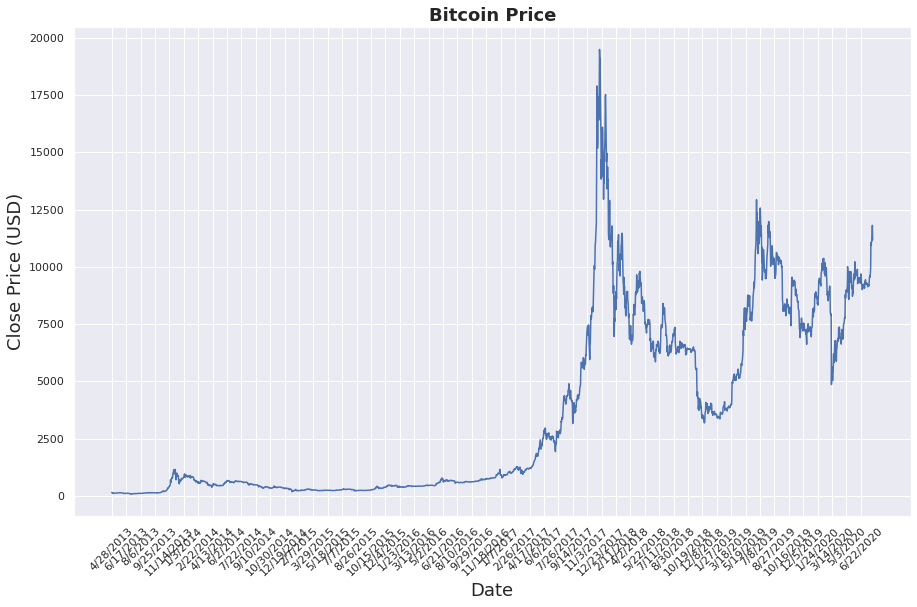

In [119]:
price = btc_data[['Close']]

plt.figure(figsize = (15,9))
plt.plot(price)
plt.xticks(range(0, btc_data.shape[0],50), btc_data['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2642 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

norm_data = min_max_scaler.fit_transform(price.values)

In [ ]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [ ]:
past_history = 5
future_target = 0

TRAIN_SPLIT = int(len(norm_data) * 0.8)


x_train, y_train = univariate_data(norm_data,
                                   0,
                                   TRAIN_SPLIT,
                                   past_history,
                                   future_target)

x_test, y_test = univariate_data(norm_data,
                                 TRAIN_SPLIT,
                                 None,
                                 past_history,
                                 future_target)

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout

num_units = 80
learning_rate = 0.0001
activation_function = 'sigmoid'
adam = Adam(lr=learning_rate)
loss_function = 'mse'
batch_size = 8
num_epochs = 60

# Initialize the RNN
model = Sequential()
model.add(LSTM(units = num_units, activation=activation_function, input_shape=(None, 1)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.1))
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer=adam, loss=loss_function)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 72)                21312     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 72)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 72)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 73        
Total params: 21,385
Trainable params: 21,385
Non-trainable params: 0
_________________________________________________________________


Train on 1897 samples, validate on 211 samples
Epoch 1/55
1897/1897 [==============================] - 2s 1ms/step - loss: 0.0329 - val_loss: 0.0301
Epoch 2/55
1897/1897 [==============================] - 2s 841us/step - loss: 0.0356 - val_loss: 0.0340
Epoch 3/55
1897/1897 [==============================] - 2s 872us/step - loss: 0.0333 - val_loss: 0.0375
Epoch 4/55
1897/1897 [==============================] - 2s 892us/step - loss: 0.0304 - val_loss: 0.0363
Epoch 5/55
1897/1897 [==============================] - 2s 934us/step - loss: 0.0325 - val_loss: 0.0343
Epoch 6/55
1897/1897 [==============================] - 2s 832us/step - loss: 0.0307 - val_loss: 0.0359
Epoch 7/55
1897/1897 [==============================] - 2s 939us/step - loss: 0.0296 - val_loss: 0.0284
Epoch 8/55
1897/1897 [==============================] - 2s 916us/step - loss: 0.0285 - val_loss: 0.0300
Epoch 9/55
1897/1897 [==============================] - 2s 827us/step - loss: 0.0280 - val_loss: 0.0304
Epoch 10/55
1897/18

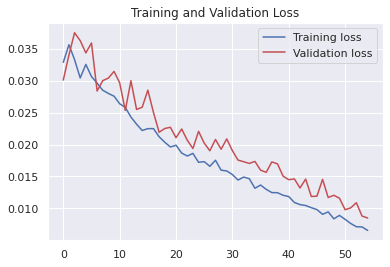

In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=num_epochs,
    shuffle=False
)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

[]

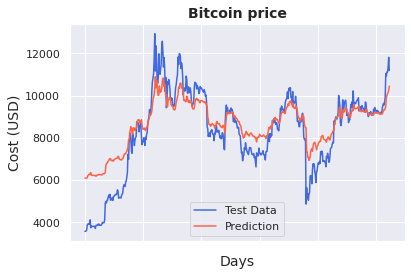

In [ ]:
original = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predictions = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))

ax = sns.lineplot(x=original.index, y=original[0], label="Test Data", color='royalblue')
ax = sns.lineplot(x=predictions.index, y=predictions[0], label="Prediction", color='tomato')
ax.set_title('Bitcoin price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)

In [141]:
last_5 = predictions[-5:]

In [142]:
last_5

,0
519,9995.534180
520,10104.878906
521,10143.879883
522,10254.041992
523,10447.729492


In [123]:
min_max_scaler.inverse_transform(model.predict(x_test))[523]

array([10447.7295], dtype=float32)

In [145]:
x_test.shape

(524, 5, 1)

In [146]:
x_test

array([[[0.18298963],
        [0.18428254],
        [0.18127209],
        [0.18115371],
        [0.18056799]],

       [[0.18428254],
        [0.18127209],
        [0.18115371],
        [0.18056799],
        [0.17978668]],

       [[0.18127209],
        [0.18115371],
        [0.18056799],
        [0.17978668],
        [0.18004866]],

       ...,

       [[0.50813656],
        [0.56516017],
        [0.55924581],
        [0.56831062],
        [0.56861069]],

       [[0.56516017],
        [0.55924581],
        [0.56831062],
        [0.56861069],
        [0.58074051]],

       [[0.55924581],
        [0.56831062],
        [0.56861069],
        [0.58074051],
        [0.60433672]]])